### Basic Rejection Sampling
Rejection sampling is a method used in statistics and computer science to generate random samples from a target probability distribution function (PDF) when the PDF is known up to a constant factor. The goal is to generate samples that are distributed according to the target PDF. In this example, we use the known distribution is uniform and the target distribution will be normal distribution.

#### Algorithm
1. Generate random sample $X_n$ with density g
2. $U_n \sim U(0,1)$ as acceptance probability
3. Output X_n if $f(X_n) \le U_n$, otherwise, reject

#### Limitation
Could not generalize because at the step __1__, we need to know the support area of the target domain. Besides, the acceptance rate of basic rejection sampling is too low and to achieve the expected number of random samples $N$, the resource and time taken could be a problem.

### Envelope Rejection Sampling

The Envelope Rejection Sampling is another technique that increases the acceptance rate compared to the basic rejection sampling. 

#### Algorithm
1. Define constant $c \ge 0$ such that $f(X) <= c g(X)$
2. Generate random sample $X_n$ with density g
3. $U_n \sim U(0,1)$
4. Ouput X_n if $f(X_n) >= c * g(X_n) * U_n$

### Implementation

In [32]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

#### Basic Rejection Sampling

In [23]:
X = stats.uniform.rvs(size=10000, scale=6, loc=-3)
P = stats.uniform.rvs(size=10000)
A = stats.norm.pdf(X)

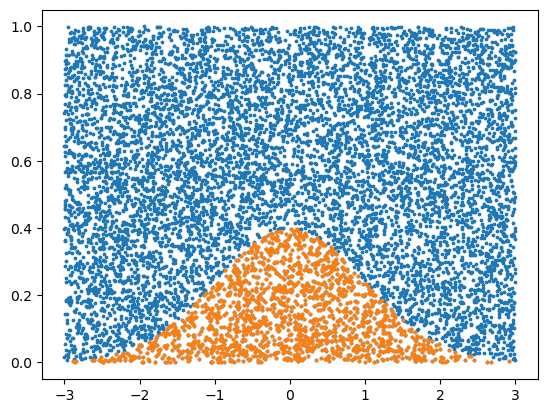

In [25]:
X_accepted = X[P <= A]
P_accepted = P[P <= A]
plt.scatter(X, P, s=3)
plt.scatter(X_accepted, P_accepted, s=3)

In [26]:
print(f"Acceptance Rate: {len(X_accepted) / len(X)}")

Acceptance Rate: 0.1595


#### Envelope Rejection Sampling

##### Half-Normal from Exponential

In [67]:
N = 10000
g = stats.expon.pdf
f = stats.halfnorm.pdf
c = 1
U = stats.uniform.rvs(size=N)
X = stats.expon.rvs(size=N)
F = f(X)
G = g(X)
X_accepted = X[F >= c * G * U]

(array([1.561e+03, 1.425e+03, 1.241e+03, 9.800e+02, 7.980e+02, 6.760e+02,
        5.200e+02, 4.540e+02, 3.750e+02, 3.190e+02, 1.890e+02, 1.340e+02,
        7.700e+01, 5.300e+01, 1.800e+01, 1.500e+01, 7.000e+00, 3.000e+00,
        1.000e+00, 5.000e+00]),
 array([5.13982387e-05, 1.95875705e-01, 3.91700011e-01, 5.87524317e-01,
        7.83348623e-01, 9.79172930e-01, 1.17499724e+00, 1.37082154e+00,
        1.56664585e+00, 1.76247015e+00, 1.95829446e+00, 2.15411877e+00,
        2.34994307e+00, 2.54576738e+00, 2.74159169e+00, 2.93741599e+00,
        3.13324030e+00, 3.32906460e+00, 3.52488891e+00, 3.72071322e+00,
        3.91653752e+00]),
 <BarContainer object of 20 artists>)

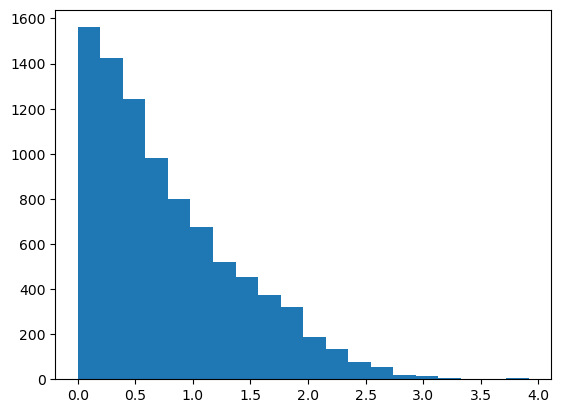

In [68]:
plt.hist(X_accepted, bins=20)

In [66]:
print(f"Acceptance Rate: {len(X_accepted) / len(X)}")

Acceptance Rate: 0.8818


##### Normal from Logistic Distribution

In [69]:
N = 10000
g = stats.logistic.pdf
f = stats.norm.pdf
c = 1
U = stats.uniform.rvs(size=N)
X = stats.logistic.rvs(size=N)
F = f(X)
G = g(X)
X_accepted = X[F >= c * G * U]

(array([  8.,  18.,  52., 109., 222., 438., 603., 824., 900., 944., 912.,
        839., 700., 542., 309., 152.,  57.,  28.,   4.,   2.]),
 array([-3.63804773, -3.26180009, -2.88555246, -2.50930482, -2.13305718,
        -1.75680954, -1.3805619 , -1.00431426, -0.62806662, -0.25181899,
         0.12442865,  0.50067629,  0.87692393,  1.25317157,  1.62941921,
         2.00566685,  2.38191448,  2.75816212,  3.13440976,  3.5106574 ,
         3.88690504]),
 <BarContainer object of 20 artists>)

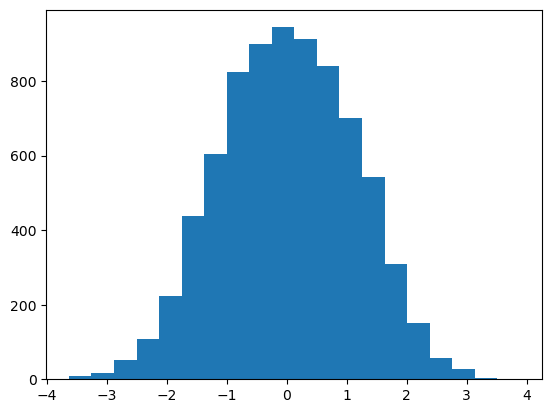

In [70]:
plt.hist(X_accepted, bins=20)

In [72]:
print(f"Acceptance Rate: {len(X_accepted) / len(X)}")

Acceptance Rate: 0.7663
